To get started, make a copy of this file and save to your "My Drive" in Google.

# How much does the U.S. owe India for climate related damages?
First, you will consider policies around “loss and damage”, or what (if any) payments are owed by countries that have been responsible for most of the historical carbon emissions to countries that have suffered most of the damage from those emissions. How big should these payments be? In particular, how much damage have historical emissions from the U.S. caused in India, the world's most populous country with the largest number of people living below the poverty line? Answering this question will involve combining multiple data streams, utilizing output from a climate model, and computing counterfactual scenerios.

In [2]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb

from google.colab import drive
drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/DATASCI 154/PS4"

Mounted at /content/drive


## Step 1: How much carbon has the U.S. emitted?

In this part, you will visualize historical emissions from the U.S. and the world from 1750-2020, consider how the U.S. has contributed to overall emissions, and decide from which year the U.S. should be held responsible for its emissions.

1. Load in the U.S. historical emissions file `us_emissions_1750_2020.csv` and the world historical emissions file `wrld_emissions_1750_2020.csv` using [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) from the `pandas` package. Merge the two datasets together by `year`, keeping only the rows corresponding to years with data from the world and the U.S. (hint: this is an inner join in [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)).


In [2]:
#NOTE: In these files, unit of emissions is GtC, gigatonnes of carbon
#Both datasets have a variable called 'year' that stores the year. You will want to merge on this variable.
#We only want to keep rows that coorespond to year that are present in both the U.S. AND the world data.

us_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/us_emissions_1750_2020.csv")
wrld_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/wrld_emissions_1750_2020.csv")
merged_df = pd.merge(us_df, wrld_df, left_on="year", right_on="year", how="inner")
merged_df

,emitter_country,year,emissions_gtc,emissions_gtc_wrld
0,USA,1750,0.000000,0.002548
1,USA,1751,0.000000,0.002548
2,USA,1752,0.000000,0.002549
3,USA,1753,0.000000,0.002549
4,USA,1754,0.000000,0.002550
...,...,...,...,...
266,USA,2016,1.429979,9.660071
267,USA,2017,1.419006,9.789029
268,USA,2018,1.464711,9.985324
269,USA,2019,1.432103,10.000682


2. Create a graph with year on the x-axis, carbon emissions on the y-axis, and two lines, one for the World and one for the U.S.

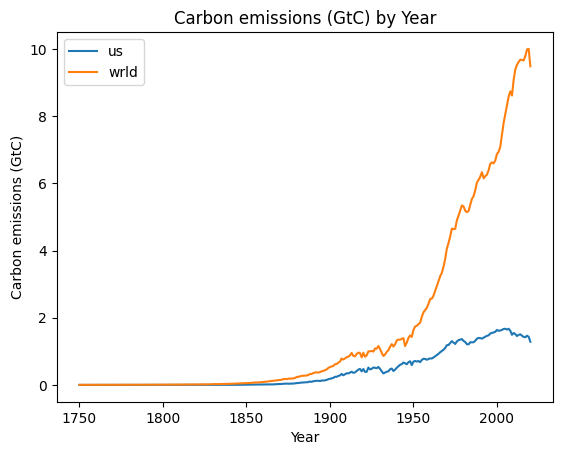

In [3]:
mplt.plot(us_df["year"], us_df["emissions_gtc"], label="us")
mplt.plot(wrld_df["year"], wrld_df["emissions_gtc_wrld"], label="wrld")
mplt.legend()
mplt.title("Carbon emissions (GtC) by Year")
mplt.xlabel("Year")
mplt.ylabel("Carbon emissions (GtC)")
mplt.show()

3. The first key question you have to take a stand on is, “since when”? Are we going to hold the U.S. accountable for all of its historical emissions since the 1700s? Or just since industrial times? Or maybe just since we first knew that carbon emissions might be harmful, somewhere around 1980?  Or the first UN climate change conference in 1992? Or in 2006, the year Al Gore released “Inconvenient Truth”?  Please decide when the US started to be responsible for the impacts of these emissions, and briefly justify your decision.


I would take since industrial times (~1850s), since this period was when processes utilizing carbon-fuels really started to take off and carbon emissions consequently ramped up. Since U.S. had the first if not one of the first mover's advantage, they would have started off contributing to a large majority of the emissions and for a long time to come.

## Step 2: How much global warming did these emissions cause?
Now, we’re going to use the output of an open source “reduced complexity” climate model called FaIR. FaIR is a way to estimate how a given pulse of carbon emissions (e.g. what I emitted when I drove to work today), or how different histories of carbon emissions (e.g. US carbon emissions since 1950), have warmed the global average temperature. We used FaIR to estimate the change in “global mean surface temperature” (GMST) due to global historical emissions. We also used FaIR to estimate what the change in GMST would have been had U.S. emissions dropped to zero the year the U.S. began being responsible for its emissions. We will use the estimate of counterfactual emissions in our calculation of climate related damages.


4. Read in the results from the FaIR model stored in the file `temperature_response_emissions_history.csv` and display the first five rows of data. The columns should be: `temp_response` (the estimated effect of emissions, including U.S. emissions, on global temperature in `year`),`temp_response_nousa` (the estimated effect of emissions, excluding U.S. emissions, on global temperature in `year`), `year` (the year the estimated effects were experienced), `damange_start_year` (the year the U.S. began being responsible for its emissions).

In [4]:
#Load in the file `temperature_response_to_emissions_history.csv`

temp_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/temperature_response_to_emissions_history.csv")
temp_df.head(5)

,temp_response,temp_response_nousa,year,damage_start_year
0,0.000001,0.000001,1770,1770
1,0.000004,0.000004,1771,1770
2,0.000010,0.000010,1772,1770
3,0.000016,0.000016,1773,1770
4,0.000023,0.000023,1774,1770


5. Create a new variable in your dataframe to store the difference in the temperature response when U.S. emissions are included versus when they are excluded. Note that this difference reflects the global temperature response attributable to U.S. emissions, and should be positive. After you have created new variable, display the first five rows of your dataframe to check your work.

In [5]:
temp_df["temp_response_usa"] = temp_df["temp_response"] - temp_df["temp_response_nousa"]
temp_df.head(5)

,temp_response,temp_response_nousa,year,damage_start_year,temp_response_usa
0,0.000001,0.000001,1770,1770,0.0
1,0.000004,0.000004,1771,1770,0.0
2,0.000010,0.000010,1772,1770,0.0
3,0.000016,0.000016,1773,1770,0.0
4,0.000023,0.000023,1774,1770,0.0


6. FaIR is a non-linear model, so the temperature change attributed to U.S. emissions in a given year will depend on when you started "counting" U.S. emissions. For example, the temperature change in 1980 that is attributable to U.S. emissions will be larger if you started counting the impact of U.S. emissions in 1850 vs. if you started counting in 1975. This dataset contains the results of running FaIR with different start years. Find the different start years represented in the data, identify the start year closest to the year you chose in Part 1, and only keep rows cooresponding to this start year.  

In [6]:
#Use df['column name'].unique() to find the unique start years

temp_df["damage_start_year"].unique()

array([1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870,
       1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,
       1990, 2000, 2010])

In [7]:
#In a new dataframe, only keep rows that meet the condition describe in question 6.
#Note 1: The symbol for equals is ==
#Note 2: In this dataframe, the years are stored as ints, so you do not need quotes around the year in your condition

temp_df = temp_df[temp_df["damage_start_year"] == 1850]
temp_df

,temp_response,temp_response_nousa,year,damage_start_year,temp_response_usa
1728,0.000016,0.000015,1850,1850,0.000002
1729,0.000070,0.000062,1851,1850,0.000007
1730,0.000152,0.000135,1852,1850,0.000017
1731,0.000246,0.000217,1853,1850,0.000029
1732,0.000350,0.000308,1854,1850,0.000043
...,...,...,...,...,...
1894,0.689001,0.517757,2016,1850,0.171243
1895,0.704583,0.531356,2017,1850,0.173227
1896,0.720282,0.545100,2018,1850,0.175183
1897,0.736140,0.559010,2019,1850,0.177131


## Step 3:  What was the effect of these emissions on temperatures in India?
FaIR gives us the global temperature change.  But warming is not uniform across the globe:  the higher latitudes warm faster than the tropics, and land warms faster than ocean.  So we next need to ask:  for a given amount of global warming, how much would we expect India to warm?  Here we are going to use an approach called “pattern scaling”, which uses information from even fancier climate models (called “general circulation models”, or GCMs) to estimate changes in a whole host of climate parameters.  We will not run these models ourselves, since they require years on a supercomputer. Instead, we're just going to take an average value for the "warming ratio", i.e. the ratio that tells us how much India warms if the globe warms by 1 degree. To estimate total warming in India due to U.S. emissions, we need to multiply the change in global temperature due to U.S. emissions from FaIR with the average warming ratio in India.


7. First, load the data stored in the `india_data.csv` file. Then, add information from the temperature response dataframe to the India dataframe through a merge, only keeping rows that coorespond to years that are present in both datasets. Finally, create a new variable that represents the estimated temperature change in India due to U.S. emissions. After you are finished, display the first five rows of your dataset and check your work.

In [8]:
india_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/india_data.csv")
merged_india_df = pd.merge(india_df, temp_df, left_on="year", right_on="year", how="inner")
merged_india_df["est_temp_change"] = merged_india_df["temp_response_usa"] * merged_india_df["warming_ratio"]
merged_india_df.head(5)

,country_code,year,temperature,gdp_pcap,population,warming_ratio,temp_response,temp_response_nousa,damage_start_year,temp_response_usa,est_temp_change
0,IND,1960,25.488705,302.671819,445954579,0.834365,0.138294,0.083234,1850,0.055060,0.045940
1,IND,1961,24.632089,307.727896,456351876,0.834365,0.142565,0.086199,1850,0.056366,0.047030
2,IND,1962,24.681752,310.376725,467024193,0.834365,0.146976,0.089288,1850,0.057688,0.048133
3,IND,1963,25.177380,322.284061,477933619,0.834365,0.151534,0.092496,1850,0.059038,0.049259
4,IND,1964,25.272684,339.203690,489059309,0.834365,0.156298,0.095864,1850,0.060434,0.050424


8. Now, we are going to estimate counterfactual temperatures in India, or what temperatures in India would have been had the U.S. had no emissions after the selected start year. For each year, we can estimate this by subtracting the estimated temperature change in India from the actual observed temperature in India.

In [9]:
#Create a new variable to store the counterfactual India temperature (what temperature would have been in India absent U.S. emissions)
#Reminder 1: The actual observed temperature in India is stored as `temperature`
#Reminder 2: You created a variable of the estimated temperature change in India in question 7

merged_india_df["temp_india_nousa"] = merged_india_df["temperature"] - merged_india_df["est_temp_change"]

9. Plot temperature vs. year for the observed temperature and for the estimated counterfactual temperature with no U.S. emissions. Year should be on the x-axis, temperature should be on the y-axis, and you should have two lines, one for the observed temperature, and one for the estimated counterfactual temperature.

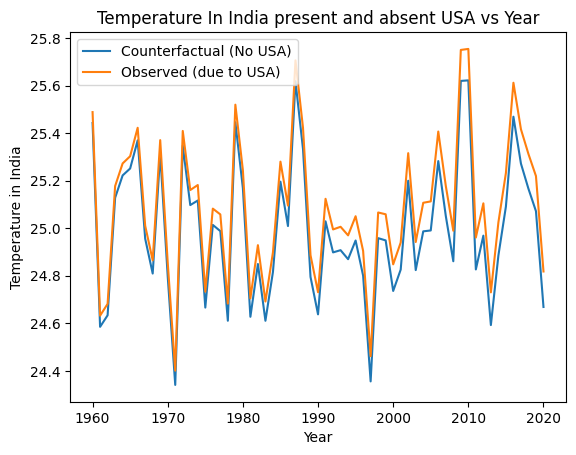

In [10]:
mplt.plot(merged_india_df["year"], merged_india_df["temp_india_nousa"], label="Counterfactual (No USA)")
mplt.plot(merged_india_df["year"], merged_india_df["temperature"], label="Observed (due to USA)")
mplt.title("Temperature In India present and absent USA vs Year")
mplt.xlabel("Year")
mplt.ylabel("Temperature in India")
mplt.legend()
mplt.show()

## Step 4:  What is the economic impact of an additional degree of warming?
Now we turn to economic data to try to understand the relationship between warming temperatures and economic output.  We’re going to use data on per capita gross domestic product (GDP) for India for over a half century, and use estimates from the literature on how past temperature changes have affected growth in GDP per capita.



The growth rate in per capita GDP in year $i$ is given by $\frac{per \ capita \ GDP_i \ - \ per \ capita \ GDP_{i-1}}{per \ capita \ GDP_{i-1}}$



Burke, Hsiang, and Miguel (2015) estimate than for a country that's as hot as India, a year that is 1 degree C hotter than average has a per-capita growth rate that is 1 percentage point lower. I.e. if the per-capita GDP India is growing at 5% a year, then in a year that is +1C hotter than average, it only grows 4% in that year, and in a year that is +2C hotter than average, it only grows 3% in that year.


We will then combine this temperature/per-capita growth relationship with our estimates of how much cooler India would have been without US emissions to calculate the impact of US emissions on the Indian economy.


10. First, we will compute the observed per-capita GDP growth rate for India.

In [11]:
#Note: Using df['variable_name'].pct_change() will be helpful

merged_india_df["gdp_growth_usa"] = merged_india_df['gdp_pcap'].pct_change()

11. Now, we are going to compute counterfactual growth, that is what the per captia GDP would have been in India had there been no U.S. emissions after the selected start year.

In [12]:
#First, we will create a new variable that stores the change in per-capita GDP due to U.S. emissions.
#In question 7 you estimated the change in temperatures in India due to U.S. emissions.
#We know that for every 1 degree increase in temperature, per-capita GDP has a 1 percent decrease.

# merged_india_df["gdp_growth_nousa"] = merged_india_df["gdp_growth_usa"] + merged_india_df["est_temp_change"]

In [13]:
#In question 10, you created a variable for the actual observed per-capita GDP growth.
#You just created a variable that gives the change in per-capita GDP growth due to U.S. emissions.
#Use these to create a second new variable that gives the counterfactual per-capita GDP growth if there had been zero U.S. emissions

merged_india_df["gdp_growth_nousa"] = merged_india_df["gdp_growth_usa"] + (merged_india_df["est_temp_change"] * 0.01)
merged_india_df

,country_code,year,temperature,gdp_pcap,population,warming_ratio,temp_response,temp_response_nousa,damage_start_year,temp_response_usa,est_temp_change,temp_india_nousa,gdp_growth_usa,gdp_growth_nousa
0,IND,1960,25.488705,302.671819,445954579,0.834365,0.138294,0.083234,1850,0.055060,0.045940,25.442765,NaN,NaN
1,IND,1961,24.632089,307.727896,456351876,0.834365,0.142565,0.086199,1850,0.056366,0.047030,24.585059,0.016705,0.017175
2,IND,1962,24.681752,310.376725,467024193,0.834365,0.146976,0.089288,1850,0.057688,0.048133,24.633619,0.008608,0.009089
3,IND,1963,25.177380,322.284061,477933619,0.834365,0.151534,0.092496,1850,0.059038,0.049259,25.128120,0.038364,0.038857
4,IND,1964,25.272684,339.203690,489059309,0.834365,0.156298,0.095864,1850,0.060434,0.050424,25.222260,0.052499,0.053003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,IND,2016,25.612235,1719.318076,1338636340,0.834365,0.689001,0.517757,1850,0.171243,0.142879,25.469356,0.070822,0.072251
57,IND,2017,25.416638,1816.730876,1354195680,0.834365,0.704583,0.531356,1850,0.173227,0.144535,25.272103,0.056658,0.058103
58,IND,2018,25.312273,1915.435271,1369003306,0.834365,0.720282,0.545100,1850,0.175183,0.146166,25.166106,0.054331,0.055792
59,IND,2019,25.219532,1972.757821,1383112050,0.834365,0.736140,0.559010,1850,0.177131,0.147792,25.071741,0.029927,0.031405


12. Now, let's start to consider the effect of U.S. emissions on per capita GDP over time.

  Recall that if per capita GDP growth is 2% in year 1, then per capita GDP in year 2 can be written as $per \ capita \ GDP_{year 2}$ = 1.02 * $per \ capita \ GDP_{year 1}$.

  Also recall that growth compounds, so if the growth in year 2 is 3%, then $per \ capita \ GDP_{year 3}$ = 1.02 * 1.03 * $per \ capita \ GDP_{year 1}$.

In [14]:
#First, perform arithmetic to adjust your counterfactual growth variable so that it can be used in calculations like the ones above.
#i.e. if your growth rate is .02, it should transform to 1.02.

merged_india_df['gdp_growth_nousa_helper'] = merged_india_df['gdp_growth_nousa'] + 1

In [15]:
#Now, create a new variable to calculate the cumulative counterfactual growth in each year.
#Note: df['variable name'].cumprod() will be helpful

merged_india_df['gdp_growth_cum'] = merged_india_df['gdp_growth_nousa_helper'].cumprod()

In [16]:
#Then, create a variable that stores damages each year.
#Damages are the difference between counterfactual per capita GDP absent US Emissions & observed per capita GDP.
#To find counterfactual per capita GDP, use an equation in the question above, per capita GDP data from the first year you consider,
#and the cumulative counterfactual growth variable you just constructed.

# Still CORRECT?

merged_india_df['gdp_pcap_nousa'] = merged_india_df['gdp_growth_cum'] * merged_india_df.loc[0, "gdp_pcap"]
merged_india_df['damages_pcap'] = merged_india_df['gdp_pcap_nousa'] - merged_india_df['gdp_pcap']

merged_india_df

,country_code,year,temperature,gdp_pcap,population,warming_ratio,temp_response,temp_response_nousa,damage_start_year,temp_response_usa,est_temp_change,temp_india_nousa,gdp_growth_usa,gdp_growth_nousa,gdp_growth_nousa_helper,gdp_growth_cum,gdp_pcap_nousa,damages_pcap
0,IND,1960,25.488705,302.671819,445954579,0.834365,0.138294,0.083234,1850,0.055060,0.045940,25.442765,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,1961,24.632089,307.727896,456351876,0.834365,0.142565,0.086199,1850,0.056366,0.047030,24.585059,0.016705,0.017175,1.017175,1.017175,307.870244,0.142347
2,IND,1962,24.681752,310.376725,467024193,0.834365,0.146976,0.089288,1850,0.057688,0.048133,24.633619,0.008608,0.009089,1.009089,1.026420,310.668484,0.291759
3,IND,1963,25.177380,322.284061,477933619,0.834365,0.151534,0.092496,1850,0.059038,0.049259,25.128120,0.038364,0.038857,1.038857,1.066304,322.740046,0.455985
4,IND,1964,25.272684,339.203690,489059309,0.834365,0.156298,0.095864,1850,0.060434,0.050424,25.222260,0.052499,0.053003,1.053003,1.122821,339.846353,0.642663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,IND,2016,25.612235,1719.318076,1338636340,0.834365,0.689001,0.517757,1850,0.171243,0.142879,25.469356,0.070822,0.072251,1.072251,5.969832,1806.899904,87.581828
57,IND,2017,25.416638,1816.730876,1354195680,0.834365,0.704583,0.531356,1850,0.173227,0.144535,25.272103,0.056658,0.058103,1.058103,6.316698,1911.886498,95.155623
58,IND,2018,25.312273,1915.435271,1369003306,0.834365,0.720282,0.545100,1850,0.175183,0.146166,25.166106,0.054331,0.055792,1.055792,6.669122,2018.555310,103.120039
59,IND,2019,25.219532,1972.757821,1383112050,0.834365,0.736140,0.559010,1850,0.177131,0.147792,25.071741,0.029927,0.031405,1.031405,6.878563,2081.947153,109.189332


## Step 5:  What does the US owe India?
Here, you put it all together. Step 2 gave you the total amount of global warming, Step 3 translated this into country specific warming, and Step 4 told you how to translate this country specific warming into impacts on per capita GDP in each year.  Now, we want to know the total sum that the US owes India since the start year you selected in step 1.





13. We want to find total GDP losses in each year, which is per capita GDP losses in each year times population in that year, and then we sum across years to get the total impact.Print the total losses. Note that the units for this number are dollars.

In [17]:
merged_india_df['damages'] = merged_india_df['damages_pcap'] * merged_india_df['population']
merged_india_df.head(5)

,country_code,year,temperature,gdp_pcap,population,warming_ratio,temp_response,temp_response_nousa,damage_start_year,temp_response_usa,est_temp_change,temp_india_nousa,gdp_growth_usa,gdp_growth_nousa,gdp_growth_nousa_helper,gdp_growth_cum,gdp_pcap_nousa,damages_pcap,damages
0,IND,1960,25.488705,302.671819,445954579,0.834365,0.138294,0.083234,1850,0.055060,0.045940,25.442765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,1961,24.632089,307.727896,456351876,0.834365,0.142565,0.086199,1850,0.056366,0.047030,24.585059,0.016705,0.017175,1.017175,1.017175,307.870244,0.142347,6.496036e+07
2,IND,1962,24.681752,310.376725,467024193,0.834365,0.146976,0.089288,1850,0.057688,0.048133,24.633619,0.008608,0.009089,1.009089,1.026420,310.668484,0.291759,1.362584e+08
3,IND,1963,25.177380,322.284061,477933619,0.834365,0.151534,0.092496,1850,0.059038,0.049259,25.128120,0.038364,0.038857,1.038857,1.066304,322.740046,0.455985,2.179307e+08
4,IND,1964,25.272684,339.203690,489059309,0.834365,0.156298,0.095864,1850,0.060434,0.050424,25.222260,0.052499,0.053003,1.053003,1.122821,339.846353,0.642663,3.143003e+08


In [18]:
print('Total losses across all years: '"${:.2f}".format(merged_india_df["damages"].sum()))

Total losses across all years: $1803157244654.03


14. In question 13, you computed total GDP losses each year. Please discuss whether these values are large or not. Some possible things to compare against: Are they large relative to total Indian GDP? relative to US aid flows to India? Relative to total US commitments to climate finance?

In [19]:
merged_india_df["gdp_usa"] = merged_india_df['gdp_pcap'] * merged_india_df['population']
merged_india_df

,country_code,year,temperature,gdp_pcap,population,warming_ratio,temp_response,temp_response_nousa,damage_start_year,temp_response_usa,est_temp_change,temp_india_nousa,gdp_growth_usa,gdp_growth_nousa,gdp_growth_nousa_helper,gdp_growth_cum,gdp_pcap_nousa,damages_pcap,damages,gdp_usa
0,IND,1960,25.488705,302.671819,445954579,0.834365,0.138294,0.083234,1850,0.055060,0.045940,25.442765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.349779e+11
1,IND,1961,24.632089,307.727896,456351876,0.834365,0.142565,0.086199,1850,0.056366,0.047030,24.585059,0.016705,0.017175,1.017175,1.017175,307.870244,0.142347,6.496036e+07,1.404322e+11
2,IND,1962,24.681752,310.376725,467024193,0.834365,0.146976,0.089288,1850,0.057688,0.048133,24.633619,0.008608,0.009089,1.009089,1.026420,310.668484,0.291759,1.362584e+08,1.449534e+11
3,IND,1963,25.177380,322.284061,477933619,0.834365,0.151534,0.092496,1850,0.059038,0.049259,25.128120,0.038364,0.038857,1.038857,1.066304,322.740046,0.455985,2.179307e+08,1.540304e+11
4,IND,1964,25.272684,339.203690,489059309,0.834365,0.156298,0.095864,1850,0.060434,0.050424,25.222260,0.052499,0.053003,1.053003,1.122821,339.846353,0.642663,3.143003e+08,1.658907e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,IND,2016,25.612235,1719.318076,1338636340,0.834365,0.689001,0.517757,1850,0.171243,0.142879,25.469356,0.070822,0.072251,1.072251,5.969832,1806.899904,87.581828,1.172402e+11,2.301542e+12
57,IND,2017,25.416638,1816.730876,1354195680,0.834365,0.704583,0.531356,1850,0.173227,0.144535,25.272103,0.056658,0.058103,1.058103,6.316698,1911.886498,95.155623,1.288593e+11,2.460209e+12
58,IND,2018,25.312273,1915.435271,1369003306,0.834365,0.720282,0.545100,1850,0.175183,0.146166,25.166106,0.054331,0.055792,1.055792,6.669122,2018.555310,103.120039,1.411717e+11,2.622237e+12
59,IND,2019,25.219532,1972.757821,1383112050,0.834365,0.736140,0.559010,1850,0.177131,0.147792,25.071741,0.029927,0.031405,1.031405,6.878563,2081.947153,109.189332,1.510211e+11,2.728545e+12


In [20]:
merged_india_df[merged_india_df["year"] >= 1968]

,country_code,year,temperature,gdp_pcap,population,warming_ratio,temp_response,temp_response_nousa,damage_start_year,temp_response_usa,est_temp_change,temp_india_nousa,gdp_growth_usa,gdp_growth_nousa,gdp_growth_nousa_helper,gdp_growth_cum,gdp_pcap_nousa,damages_pcap,damages,gdp_usa
8,IND,1968,24.864921,338.432624,533431909,0.834365,0.177729,0.111127,1850,0.066602,0.055571,24.809350,0.012262,0.012818,1.012818,1.122673,339.801426,1.368802,7.301627e+08,1.805308e+11
9,IND,1969,25.370798,352.883206,545314670,0.834365,0.183723,0.115418,1850,0.068304,0.056991,25.313807,0.042699,0.043268,1.043268,1.171249,354.504109,1.620903,8.839024e+08,1.924324e+11
10,IND,1970,24.855112,362.991056,557501301,0.834365,0.190084,0.119996,1850,0.070089,0.058480,24.796632,0.028644,0.029228,1.029228,1.205483,364.865701,1.874644,1.045117e+09,2.023680e+11
11,IND,1971,24.400626,360.717461,569999178,0.834365,0.196856,0.124895,1850,0.071961,0.060042,24.340585,-0.006264,-0.005663,0.994337,1.198656,362.799435,2.081974,1.186723e+09,2.056087e+11
12,IND,1972,25.409436,350.561000,582837973,0.834365,0.204001,0.130099,1850,0.073903,0.061662,25.347774,-0.028156,-0.027540,0.972460,1.165646,352.808061,2.247062,1.309673e+09,2.043203e+11
13,IND,1973,25.160753,353.783265,596107483,0.834365,0.211500,0.135584,1850,0.075916,0.063342,25.097411,0.009192,0.009825,1.009825,1.177098,356.274456,2.491191,1.485018e+09,2.108929e+11
14,IND,1974,25.181807,349.725681,609721951,0.834365,0.219306,0.141317,1850,0.077989,0.065071,25.116736,-0.011469,-0.010818,0.989182,1.164364,352.420131,2.694451,1.642866e+09,2.132354e+11
15,IND,1975,24.732879,372.964621,623524219,0.834365,0.227282,0.147220,1850,0.080062,0.066801,24.666078,0.066449,0.067117,1.067117,1.242513,376.073534,3.108914,1.938483e+09,2.325525e+11
16,IND,1976,25.082480,370.528803,637451448,0.834365,0.235401,0.153278,1850,0.082123,0.068521,25.013960,-0.006531,-0.005846,0.994154,1.235249,373.875101,3.346298,2.133103e+09,2.361941e+11
17,IND,1977,25.058150,388.407475,651685628,0.834365,0.243763,0.159541,1850,0.084222,0.070272,24.987879,0.048252,0.048954,1.048954,1.295720,392.177966,3.770491,2.457175e+09,2.531196e+11


Looking at the "damages" column, which is the total GDP losses per year, these values are indeed very large. Starting off even at 1961, the damage amounts to $65.0 million, which is an immense amount for India especially in the past.

Relative to total Indian GDP: I calculated gdp_usa, which is India's observed GDP in the presence of U.S' effects. From 1961 to 1968, the damages amount is 3 orders of magnitudes lower, and thus is not really that significant. However, this amount starts increasing exponentially and is mostly only 1 order of magnitude lower. This effectively means India's current GDP is only 90% of what the counterfactual could be, due to U.S carbon emissions indirectly.

Relative to US aid flows to India: Taken from [Wikipedia](https://en.wikipedia.org/wiki/Foreign_aid_to_India#:~:text=The%20United%20States%20Agency%20for,to%20be%20USD%2065.1%20billion.), "in the period 1946-2012, India has been the recipient of highest aid from United States. The amount of economic aid, adjusted to inflation then, was reported to be USD 65.1 billion." This amount is definitely insufficient to compensate for the GDP losses for 1 year, much less the entire stated period. In 2010 alone, India had a GDP loss of $65.9 billion.

Relative to total US commitments to climate finance: With reference to this [site](https://www.whitehouse.gov/briefing-room/statements-releases/2023/04/20/fact-sheet-president-biden-to-catalyze-global-climate-action-through-the-major-economies-forum-on-energy-and-climate/), in April 2023, "the United States is providing \$1 billion to the Green Climate Fund (GCF), bringing total U.S. contributions to the GCF to \$2 billion." This is a very insignificant amount comparatively, as most recently in 2020 alone, India's damages has amounted to $143 billion

15. Discuss whether you think this calculation adequately captures what the US owes to India for past climate damages. Do you think the US owes more than this? Less? Why?

I think this is inadequate, as this climate damage only comes from increased temperatures. Climate damage negatively affects working environments as well, as such the air quality, erraticness of weather, and extreme events like natural disasters that altogether impact productivity and overall economic stability much more heavily. In fact, all of these can contribute to increase mortality rates which is further GDP loss.

16. Please read this [article](https://www.orsimpact.com/DirectoryAttachments/132018_13248_359_Center_Pathways_FINAL.pdf) about 10 pathways to change.  Then, please discuss how your findings could be incorporated into one of these theories of change.

These findings could be incorporated into the Power Politics/Power Elites theory of change, which focuses on influencing policy by working directly with elite decision makers and influencers, with the assumption that some individuals and groups hold more power than others, and influencing one policy area does not necessarily confer influence in other areas.

They can also be used in combination with the Media Influence or Agenda-Setting theory for a more powerful effect. This theory states that political issues emphasized in media coverage strongly influence the public agenda and assumes media shapes reality, has inherent biases, and different outlets have varying influence.

Since the findings indicate that the immense economic losses India has suffered due to US carbon emissions far exceed the aid provided by the US to India over the same time period, advocates could provide these findings  to mainstream and social media outlets to create a compelling media narrative. This not only informs the broader public and raises awareness, but also has the ability to attract attention from influential US policymakers or political elites, especially during presidential elections or such. This will help make the case that the US should drastically increase climate financing and aid to impacted countries like India in the future.

Targeting political elites like Congressional committee members overseeing climate and foreign aid policies, White House/administration officials, and leaders from government agencies like USAID and the State Department, or high-profile media like New York Times, NPR, CNN would help push the agenda for palpable change.


17. Please re-run the notebook for the start year of 2000, and comment on how your results change if you pick a different start year.

In [3]:
us_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/us_emissions_1750_2020.csv")
wrld_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/wrld_emissions_1750_2020.csv")
merged_df = pd.merge(us_df, wrld_df, left_on="year", right_on="year", how="inner")
temp_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/temperature_response_to_emissions_history.csv")
temp_df["temp_response_usa"] = temp_df["temp_response"] - temp_df["temp_response_nousa"]
temp_df = temp_df[temp_df["damage_start_year"] == 2000]
india_df = pd.read_csv(f"/content/drive/My Drive/{FOLDERNAME}/india_data.csv")
merged_india_df = pd.merge(india_df, temp_df, left_on="year", right_on="year", how="inner")
merged_india_df["est_temp_change"] = merged_india_df["temp_response_usa"] * merged_india_df["warming_ratio"]
merged_india_df["temp_india_nousa"] = merged_india_df["temperature"] - merged_india_df["est_temp_change"]
merged_india_df["gdp_growth_usa"] = merged_india_df['gdp_pcap'].pct_change()
merged_india_df["gdp_growth_nousa"] = merged_india_df["gdp_growth_usa"] + (merged_india_df["est_temp_change"] * 0.01)
merged_india_df['gdp_growth_nousa_helper'] = merged_india_df['gdp_growth_nousa'] + 1
merged_india_df['gdp_growth_cum'] = merged_india_df['gdp_growth_nousa_helper'].cumprod()
merged_india_df['gdp_pcap_nousa'] = merged_india_df['gdp_growth_cum'] * merged_india_df.loc[0, "gdp_pcap"]
merged_india_df['damages_pcap'] = merged_india_df['gdp_pcap_nousa'] - merged_india_df['gdp_pcap']
merged_india_df['damages'] = merged_india_df['damages_pcap'] * merged_india_df['population']
print('Total losses across all years: '"${:.2f}".format(merged_india_df["damages"].sum()))
merged_india_df["gdp_usa"] = merged_india_df['gdp_pcap'] * merged_india_df['population']
merged_india_df

Total losses across all years: $71309494084.84


,country_code,year,temperature,gdp_pcap,population,warming_ratio,temp_response,temp_response_nousa,damage_start_year,temp_response_usa,est_temp_change,temp_india_nousa,gdp_growth_usa,gdp_growth_nousa,gdp_growth_nousa_helper,gdp_growth_cum,gdp_pcap_nousa,damages_pcap,damages,gdp_usa
0,IND,2000,24.847981,757.668747,1059633675,0.834365,0.002078,0.001584,2000,0.000494,0.000412,24.847569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.028513e+11
1,IND,2001,24.939831,780.606234,1078970907,0.834365,0.008901,0.006802,2000,0.002099,0.001751,24.938080,0.030274,0.030291,1.030291,1.030291,780.619504,0.013270,1.431827e+07,8.422514e+11
2,IND,2002,25.315932,796.724786,1098313039,0.834365,0.019253,0.014757,2000,0.004496,0.003752,25.312181,0.020649,0.020686,1.020686,1.051604,796.767616,0.042831,4.704155e+07,8.750532e+11
3,IND,2003,24.942000,845.274844,1117415123,0.834365,0.030969,0.023822,2000,0.007147,0.005964,24.936037,0.060937,0.060997,1.060997,1.115749,845.367801,0.092956,1.038707e+08,9.445229e+11
4,IND,2004,25.107121,897.628233,1136264583,0.834365,0.043642,0.033709,2000,0.009932,0.008287,25.098834,0.061937,0.062019,1.062019,1.184947,897.797004,0.168771,1.917685e+08,1.019943e+12
5,IND,2005,25.112937,953.567973,1154638713,0.834365,0.057167,0.044353,2000,0.012814,0.010692,25.102245,0.062319,0.062426,1.062426,1.258919,953.843254,0.275281,3.178499e+08,1.101026e+12
6,IND,2006,25.406946,1014.627641,1172373788,0.834365,0.071435,0.055678,2000,0.015757,0.013147,25.393799,0.064033,0.064164,1.064164,1.339696,1015.045950,0.418309,4.904144e+08,1.189523e+12
7,IND,2007,25.178387,1075.994087,1189691809,0.834365,0.086353,0.067623,2000,0.018730,0.015628,25.162759,0.060482,0.060638,1.060638,1.420933,1076.596326,0.602239,7.164787e+08,1.280101e+12
8,IND,2008,24.989473,1093.076551,1206734806,0.834365,0.101829,0.080116,2000,0.021713,0.018117,24.971356,0.015876,0.016057,1.016057,1.443749,1093.883394,0.806843,9.736451e+08,1.319054e+12
9,IND,2009,25.750380,1162.498808,1223640160,0.834365,0.117669,0.093026,2000,0.024643,0.020561,25.729820,0.063511,0.063716,1.063716,1.535739,1163.581806,1.082998,1.325200e+09,1.422480e+12


I initally chose start year 1850, but the data on India only started from 1960, and the loss was \$1 803 157 244 654.03, compared to this start year of 2000, which amounted to just \$71 309 494 084.84

Therefore, choosing an earlier year causes the damages to differ by 2 orders of magnitude (100x) more. Additionally, starting earlier means the damages would have more time to compound, thus rising exponentially faster, resulting in exponentially higher damages.

In [4]:
# If it contains spaces, use '\ ' to represent each space E.g. 'Summer\ PSet\ 1.ipynb'
FILENAME = "PS4_AndrewYu.ipynb"

%cd drive/My\ Drive
%cd $FOLDERNAME
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!pip install PyPDF2

!jupyter nbconvert --log-level CRITICAL --to pdf $FILENAME

/content/drive/My Drive
/content/drive/My Drive/Stanford Summer Session/DATASCI 154/PS4
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf